<a href="https://colab.research.google.com/github/thedatadj/neural-networks/blob/main/wine_prediction_and_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Description
In this project I predict whether the wine is white or red (binary classification task) and the quality of the wine (regression task).

# Data
The dataset for this problem is the **[Wine Quality Dataset](https://archive.ics.uci.edu/ml/datasets/Wine+Quality)** from the **UCI machine learning repository**. It has separate datasets for red wine and white wine.

In [1]:
# Download data
!gdown 1UQlWkO5JAmMfwUJ_9x8RMbkVzQq6UqXb
!gdown 1yjGh23nlPB818hKW8SqB3q_nOQ7bEUrI

Downloading...
From: https://drive.google.com/uc?id=1UQlWkO5JAmMfwUJ_9x8RMbkVzQq6UqXb
To: /content/winequality-red.csv
100% 84.2k/84.2k [00:00<00:00, 75.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yjGh23nlPB818hKW8SqB3q_nOQ7bEUrI
To: /content/winequality-white.csv
100% 264k/264k [00:00<00:00, 110MB/s]


In [7]:
import pandas as pd

# Load the data
white_data = pd.read_csv("/content/winequality-white.csv", sep=';')
red_data = pd.read_csv("/content/winequality-red.csv", sep=';')

# Preprocessing
I will add a column `is_red` for the classification task, to both datasets indicating whether the wine is red or not.

In [8]:
white_data['is_red'] = 0
red_data['is_red'] = 1

## Handle duplicated data

In [9]:
white_data = white_data.drop_duplicates(keep='first')
red_data = red_data.drop_duplicates(keep='first')

## Combine datasets

In [66]:
data = pd.concat([red_data, white_data], ignore_index=True)

## Shuffle the data

In [67]:
import numpy as np

data = data.iloc[np.random.permutation(len(data))]

In [68]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
2164,6.6,0.20,0.32,1.1,0.039,25.0,78.0,0.99260,3.39,0.54,10.2,7,0
4706,6.2,0.20,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6,6,0
2190,8.6,0.16,0.38,3.4,0.040,41.0,143.0,0.99320,2.95,0.39,10.2,6,0
1497,7.0,0.23,0.36,13.0,0.051,72.0,177.0,0.99720,3.16,0.49,9.8,5,0
835,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,1


## Handle imbalance datasets
Check if this dataset is imbalance.

<Axes: >

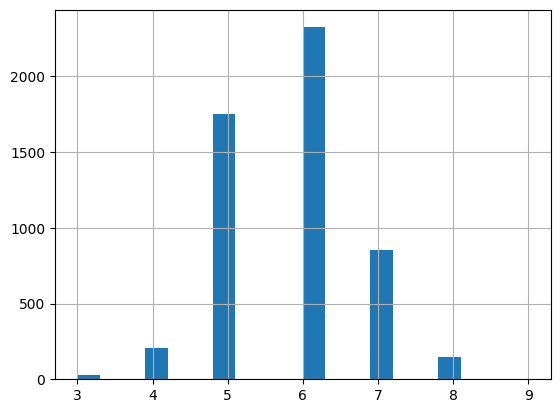

In [69]:
data.quality.hist(bins=20)

I remove the observations which quality is 3, 4, 8 and 9.

In [70]:
data = data[(data.quality > 4) & (data.quality < 8) ]

# reset index
data = data.reset_index(drop=True)

In [71]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,6.6,0.20,0.32,1.1,0.039,25.0,78.0,0.99260,3.39,0.54,10.2,7,0
1,6.2,0.20,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6,6,0
2,8.6,0.16,0.38,3.4,0.040,41.0,143.0,0.99320,2.95,0.39,10.2,6,0
3,7.0,0.23,0.36,13.0,0.051,72.0,177.0,0.99720,3.16,0.49,9.8,5,0
4,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,1


<Axes: >

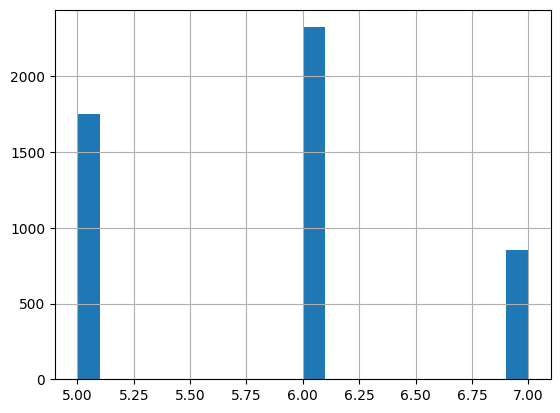

In [72]:
# Check balance
data.quality.hist(bins=20)

## Data split

In [47]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, random_state=0)

In [48]:
# Validation split
train_set, valid_set = train_test_split(train_set, random_state=0)

**Feature/target split**

In [63]:
# Training set
X_train = train_set.copy()
y_train = np.array(X_train.pop('quality')), np.array(X_train.pop('is_red'))

# Validation set
X_valid = valid_set.copy()
y_valid = np.array(X_valid.pop('quality')), np.array(X_valid.pop('is_red'))

# Test set
X_test = test_set.copy()
y_test = np.array(X_test.pop('quality')), np.array(X_test.pop('is_red'))

## Normalize the data

In [73]:
data.pop('quality')
data.pop('is_red')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,6.6,0.20,0.32,1.1,0.039,25.0,78.0,0.99260,3.39,0.54,10.2
1,6.2,0.20,0.25,15.0,0.055,8.0,120.0,0.99767,3.19,0.53,9.6
2,8.6,0.16,0.38,3.4,0.040,41.0,143.0,0.99320,2.95,0.39,10.2
3,7.0,0.23,0.36,13.0,0.051,72.0,177.0,0.99720,3.16,0.49,9.8
4,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4


In [74]:
X_train = (X_train - data.mean())/data.std()
X_valid = (X_valid - data.mean())/data.std()
X_test = (X_test - data.mean())/data.std()

In [75]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
4791,-0.545007,-1.105332,0.068782,-0.065851,-0.382114,0.859490,-0.011490,-0.874209,-0.273808,-0.641068,0.578816
2286,-1.530122,0.188391,0.068782,-0.857344,-0.793710,-1.010314,-0.595772,-1.481267,0.923187,-1.045526,1.006097
3765,-0.772342,-0.058033,-0.205124,-0.835358,-0.409553,-0.250706,0.413442,0.339908,3.443175,0.707125,-0.873940
757,0.743220,0.188391,2.191549,1.934868,-0.382114,-0.484432,0.997724,1.395514,-1.470802,1.785679,-1.044853
4000,2.258781,0.434814,0.753546,-0.637485,1.456347,-1.127177,-1.374814,0.906495,-0.399807,0.909354,0.236991


# Modeling

In [76]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

input = Input(shape=[11])
x = Dense(128, activation='relu')(input)
x = Dense(128, activation='relu')(x)
regression = Dense(1, name='quality')(x)
classification = Dense(1, activation='sigmoid', name='type')(x)

model = Model(inputs=[input], outputs=[regression, classification])

In [79]:
from tensorflow.keras.metrics import RootMeanSquaredError

# Compiling
model.compile(optimizer='adam',
              loss={'quality': 'mse',
                    'type': 'binary_crossentropy'},
              metrics={'quality': RootMeanSquaredError(),
                       'type': ['accuracy']})

In [80]:
# Training
model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
87/87 [==============================] - 2s 8ms/step - loss: 8.2648 - quality_loss: 7.6822 - type_loss: 0.5826 - quality_root_mean_squared_error: 2.7717 - type_accuracy: 0.6004 - val_loss: 2.2661 - val_quality_loss: 1.9302 - val_type_loss: 0.3359 - val_quality_root_mean_squared_error: 1.3893 - val_type_accuracy: 0.8714
Epoch 2/10
87/87 [==============================] - 0s 4ms/step - loss: 1.7034 - quality_loss: 1.4901 - type_loss: 0.2133 - quality_root_mean_squared_error: 1.2207 - type_accuracy: 0.9697 - val_loss: 1.5778 - val_quality_loss: 1.4435 - val_type_loss: 0.1343 - val_quality_root_mean_squared_error: 1.2015 - val_type_accuracy: 0.9816
Epoch 3/10
87/87 [==============================] - 0s 4ms/step - loss: 1.2519 - quality_loss: 1.1507 - type_loss: 0.1012 - quality_root_mean_squared_error: 1.0727 - type_accuracy: 0.9899 - val_loss: 1.2273 - val_quality_loss: 1.1501 - val_type_loss: 0.0772 - val_quality_root_mean_squared_error: 1.0724 - val_type_accuracy: 0.9881
Epoc

# Evaluation

In [81]:
loss, quality_loss, type_loss, quality_rmse, type_accuracy = model.evaluate(x=X_valid, y=y_valid)

print()
print(f'loss: {loss}')
print(f'wine_quality_loss: {quality_loss}')
print(f'wine_type_loss: {type_loss}')
print(f'wine_quality_rmse: {quality_rmse}')
print(f'wine_type_accuracy: {type_accuracy}')

29/29 [==============================] - 0s 3ms/step - loss: 0.4279 - quality_loss: 0.3888 - type_loss: 0.0391 - quality_root_mean_squared_error: 0.6235 - type_accuracy: 0.9924

loss: 0.4279133677482605
wine_quality_loss: 0.38879096508026123
wine_type_loss: 0.039122410118579865
wine_quality_rmse: 0.6235310435295105
wine_type_accuracy: 0.9924324154853821
